A cellular automaton is a discrete model of computation consisting on a regular grid of cells, each in one of a finite number of states, such as on and off. For each cell, a set of cells called its neighborhood is defined relative to the specified cell. An initial state is selected by assigning a state for each cell. A new generation is created according to some fixed rule that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. Typically, the rule for updating the state of cells is the same for each cell and does not change over time, and is applied to the whole grid simultaneously.

The concept was discovered in the 1940s by Stanislaw Ulam and John von Neumann, and it was popularized in the 80s by John Horton Conway's Game of Life, a two-dimensional cellular automaton in which all possible evolutions depend on the initial state

![An example of a cellular automaton. Retain this image, since it will be of use later on!](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)

# First task: The elementary cellular automata

The first task for this assignment is to use a 1D cellular automata to analyse the effect of a series of "rules", which are mathematic functions that determine the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. We are presented with the following three rules, which tell us the new state for the center cell as a function of the current pattern:

| Rule Number | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |     Current Pattern     |
|-------------|-----|-----|-----|-----|-----|-----|-----|-----|-------------------------|
|     45      | 0   | 0   | 1   | 0   | 1   | 1   | 0   | 1   |New state for center cell|
|     48      | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 0   |New state for center cell|
|    110      | 0   | 1   | 1   | 0   | 1   | 1   | 1   | 0   |New state for center cell|

To do this easily, I reused some code found on [this blog post](https://towardsdatascience.com/simple-but-stunning-animated-cellular-automata-in-python-c912e0c156a9) from Towards Data Science, a magnificent blog I trully and sincerely recommend. I adapted the code so that it is callable as a function, with a set of initial conditions that can be specified by the user, and so that it is more simple, readable and understandable. We start by importing some necessary modules:

In [1]:
import numpy as np                     #Supports common numeric operations
from scipy.signal import convolve2d    #For step updating
from matplotlib import animation       #Creates animations (which we can then display as HTML, gif, etc)   
import matplotlib.pyplot as plt        #For graphs      
from IPython import display            #To display things on Jupyter; in this case, the animations

We then define the function that updates the steps in our linear world:

In [2]:
def step_linear(x, rule_binary):
    x_shift_right = np.roll(x, 1); x_shift_left = np.roll(x, -1)
    y = np.vstack((x_shift_right, x, x_shift_left)).astype(int) 
    z = np.sum(np.array([[4], [2], [1]]) * y, axis=0).astype(int) 
    return rule_binary[7 - z]

And the animation function:

In [3]:
def animate_linear(initial_conditions, rule_number, steps = 200, 
                   figtype = "animate", noaxis = True, save = False):
    
    assert 0 <= rule_number <= 255 #The binary rule's format
    
    cell_numb = len(initial_conditions)
    rule_binary_str = np.binary_repr(rule_number, width=8)  #Convert decimal to binary
    rule_binary = np.array([int(ch) for ch in rule_binary_str], dtype=int)
    x = np.zeros((steps, cell_numb), dtype=int)
    x[0, :] = initial_conditions #The first row is the initial conditions vector
    
    for i in range(steps - 1): #Populate the animated matrix
        x[i + 1, :] = step_linear(x[i, :], rule_binary)
        
    global ax; global fig #Make external axis accesible
    if noaxis == True: #Redundant, could remove ''== True'
        fig = plt.figure() #Set axis where we will animate
        ax = plt.axes()
    
    def animate_lin(i):
        ax.clear(); ax.set_axis_off() #Restart for each iteration
        Y = np.zeros((cell_numb, cell_numb), dtype=int) 
        upper_boundary = (i + 1) #Show 1 iteration per frame
        lower_boundary = 0 if upper_boundary <= cell_numb else upper_boundary - cell_numb 
        for t in range(lower_boundary, upper_boundary): 
            Y[t - lower_boundary, :] = x[t, :]
        img = ax.imshow(Y, interpolation='none',cmap='gray_r')
        return [img]
    
    if figtype == "animate":
        anim = animation.FuncAnimation(fig, animate_lin, frames=cell_numb, interval=50, blit=True)
        if save == True : anim.save(f'Linear_cell_automata_rule_{rule_number}.gif')
        video = anim.to_html5_video(); html = display.HTML(video)
        display.display(html);
    else:
        animate_lin(steps-1)
        ax.set_title(f"Rule {rule_number}", fontsize=15)

And, ¡that's it! We now have a simple system that can tell us how a cellular automaton works in a smart, inrteresting and interactive way. To further study this system, the enunciado tells us to test 3 different rules in 5 different scenarios, to see what happens. Lets go!

First, I will try and see what happens if we put "A single black (1) cell in the middle of the array". To make the data visualization easier on the eyes, more manageable and more understandable, I will just plot the static map which shows the full evolution of the cellular automata, with each rown being  a point in time, starting at the top and ending at the bottom; an animated version can be accessed by changing type to "animated".

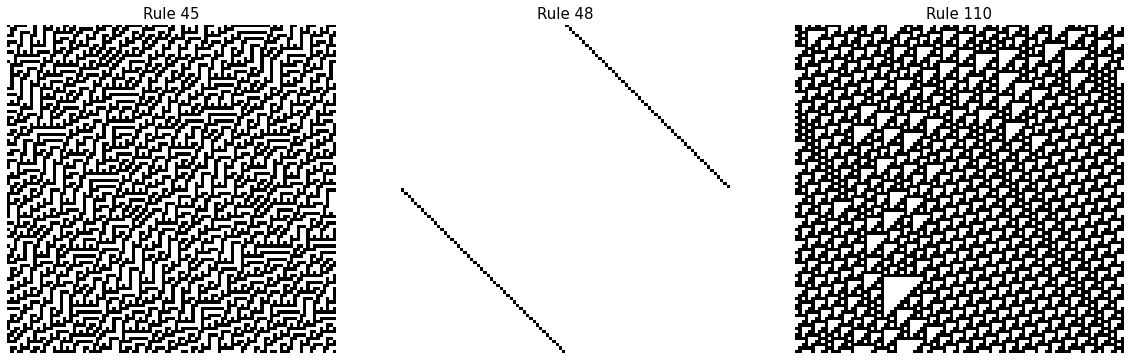

In [4]:
initial_conditions = np.zeros(100); initial_conditions[50] = 1
fig = plt.figure(figsize=(20, 30)) 
ax = fig.add_subplot(131)
animate_linear(initial_conditions, 45, figtype = "static", noaxis = False);
ax = fig.add_subplot(132)
animate_linear(initial_conditions, 48, figtype = "static", noaxis = False);
ax = fig.add_subplot(133)
animate_linear(initial_conditions, 110, figtype = "static", noaxis = False);

Then, we can see what happens when the initial conditions are "Half black (1) cells and half white (0) cells at randomly chosen positions"

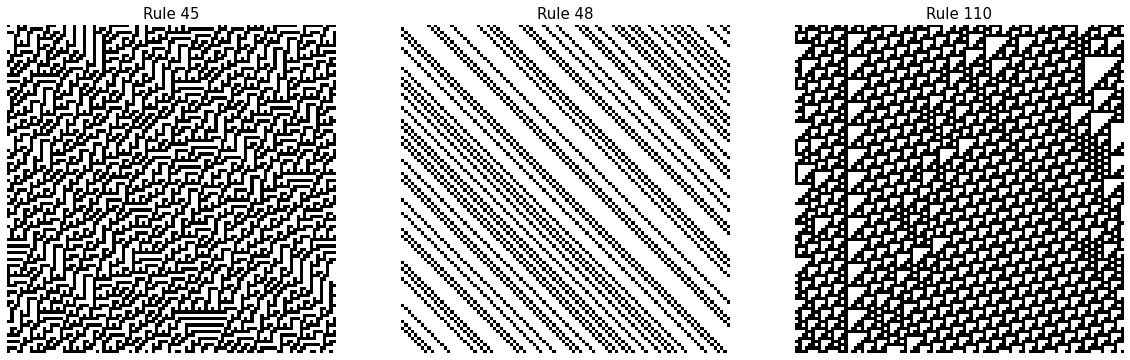

In [5]:
initial_conditions = np.random.choice([0, 1], size=(100,), p=[0.5, 0.5])
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(131)
animate_linear(initial_conditions, 45, figtype = "static", noaxis = False);
ax = fig.add_subplot(132)
animate_linear(initial_conditions, 48, figtype = "static", noaxis = False);
ax = fig.add_subplot(133)
animate_linear(initial_conditions, 110, figtype = "static", noaxis = False);

When there are "25% of black (1) cells and 75% of white (0) cells (approximately)"

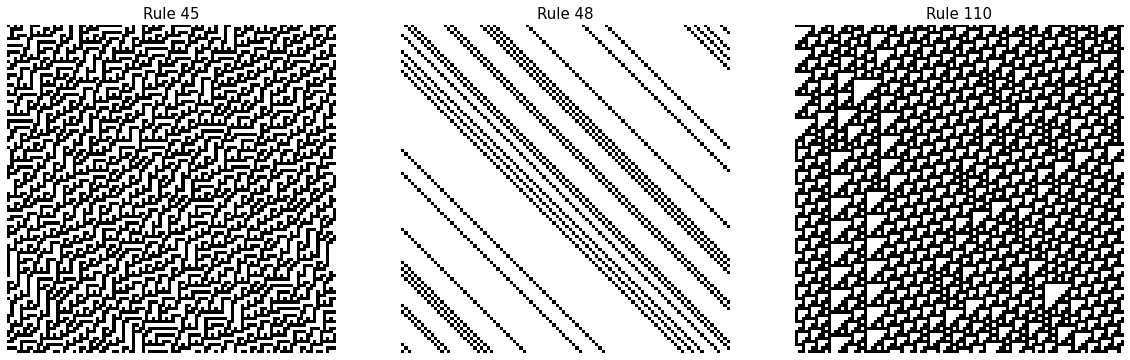

In [6]:
initial_conditions = np.random.choice([0, 1], size=(100,), p=[0.75, 0.25])
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(131)
animate_linear(initial_conditions, 45, figtype = "static", noaxis = False);
ax = fig.add_subplot(132)
animate_linear(initial_conditions, 48, figtype = "static", noaxis = False);
ax = fig.add_subplot(133)
animate_linear(initial_conditions, 110, figtype = "static", noaxis = False);

And when there are "90% of black (1) cells and 10% of white (0) cells (approximately)"

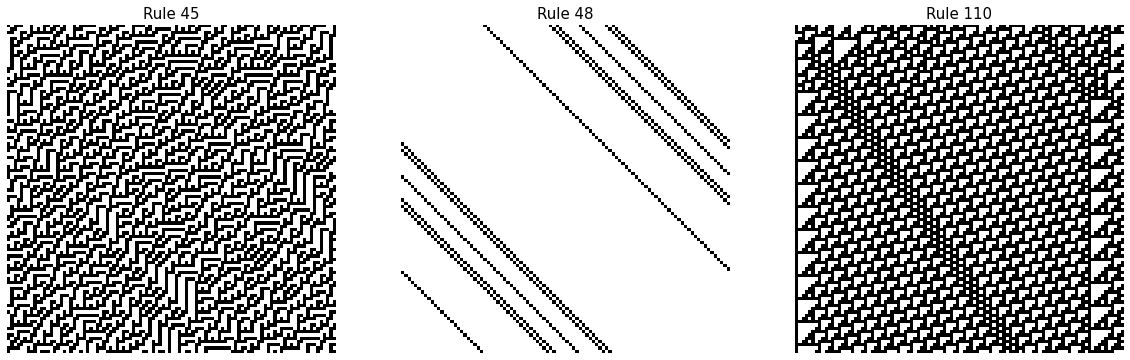

In [7]:
initial_conditions = np.random.choice([0, 1], size=(100,), p=[0.1, 0.9])
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(131)
animate_linear(initial_conditions, 45, figtype = "static", noaxis = False);
ax = fig.add_subplot(132)
animate_linear(initial_conditions, 48, figtype = "static", noaxis = False);
ax = fig.add_subplot(133)
animate_linear(initial_conditions, 110, figtype = "static", noaxis = False);

I must say I am **really, really really** proud of this code. It is simple, customizable, good, made by me (with some help from the internet of course) and serves a wide variety of use cases! It really deserves a good grade :D

Now, *al meollo*: **can we see repeated patterns? How long does it take for a pattern to repeat?**. Although this visualization makes it easy for the human eye to detect $ 2D$  patterns, this is misleading: our colony is **lineal only**, and pattern repetition should be analyzed **line by line, not in two dimensions**.

Taking this into account, we can still say that there are some repeated patterns, which ar the most obvious for **rule 110**. Though not regular, the colonies of cells that follow this rule seem to follow a kind of pattern, which, in 2D, ends up looking like stairs and steps with some isolated boxes in between. Rule 110 has indeed proven to be [in the boundaries between chaos and stability](http://www.complex-systems.com/pdf/15-1-1.pdf), and might actually be the smallest nown Turing-complete machine (i.e., one which  is able to recognize or decide on other data-manipulation rule sets).

For **rule 48**, no interesting patterns are observed: just simple lines of alive cells, maybe like unicellular kelp growing undisturbed on a lake. For **rule 45**, however, an interesting sort of "pattern" emmerges, although, just by myself, I cannot be quite sure whether it is chaotic or just random. Some have suggested, however, that [at least some periodicy can be found on its diagonals](https://community.wolfram.com/groups/-/m/t/1733073), so this system might lean more on the chaotic side than on the random one.

We were also asked to figure out wether the array length influences the time it takes for a pattern to repeat. To analyze this, I have chosen rule 110, which seems to exhibit a simple and clearly recognizable pattern. I have knowingly regenerated the random vector on each iteration, and chosen the first 25, 50 and 75 values, with the full 100 values availaible in the last point.

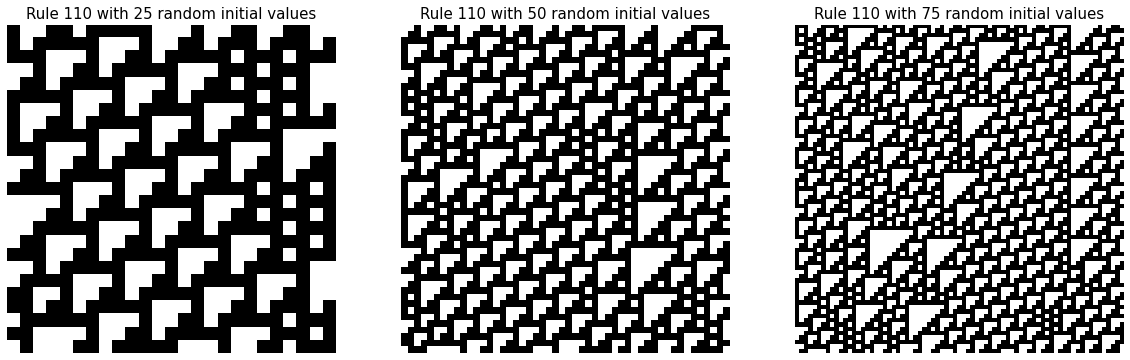

In [8]:
initial_conditions = np.random.choice([0, 1], size=(100,), p=[0.1, 0.9])
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(131)
animate_linear(initial_conditions[0:25], 110, figtype = "static", noaxis = False)
ax.set_title("Rule 110 with 25 random initial values", fontsize=15);
initial_conditions = np.random.choice([0, 1], size=(100,), p=[0.1, 0.9])
ax = fig.add_subplot(132)
animate_linear(initial_conditions[0:50], 110, figtype = "static", noaxis = False)
ax.set_title("Rule 110 with 50 random initial values", fontsize=15);
initial_conditions = np.random.choice([0, 1], size=(100,), p=[0.1, 0.9])
ax = fig.add_subplot(133)
animate_linear(initial_conditions[0:75], 110, figtype = "static", noaxis = False)
ax.set_title("Rule 110 with 75 random initial values", fontsize=15);

The squared design I have chosen for my grids means that, the smaller the number of cells, the less resolution there is; but, to be honest, there is no need for more: we can already see that, **no matter the length of the initial conditions array**, the pattern starts appearing almost inmediately, without delay, and regardless of the size of the initial array. This reminds me of fractals, although I am clearly not an expert on the matter.

The last question tells us to cathegorize our three cellular automatas (the ones that stem from our three rules) using Wolfram's classification ([¡created by the guy behind wolfram alpha!! UwU](https://www.wolframscience.com/nks/p231--four-classes-of-behavior/)), which creates 4 classes, starting from a random initial state:

1. Evolution leads to a homogeneous state.
2. Evolution leads to a set of separated simple stable or periodic structures.
3. Evolution leads to a chaotic pattern.
4. Evolution leads to complex localized structures, sometimes long-lived.

I would say the first structures, those generated by **rule 45**, belong to **the third wolfram class**; the pattern seems to be completely chaotic, and, although some laberyth-like structures do seem to appear, I dont believe one can count them as non-random.

Talking about **rule 110**, I would say the patterns it creates belong to **the fourth class**, since it seems to lead to complex structures that propagate locally in the lattice. In fact, as we have already discussed, rule 110 has found to be one of the smallest turing-complete machines ever discovered, and it is of great interest to Cellular Automata 

With regards to **rule 48**, I would say it belongs to **the second class**, as we can see those "fine lines" of development surrounded by a sea of nothing, which, by the way, remind me of the growing of very simple kelp on the sea.

One interesting take-home message might be that the really important part here is, in fact, the rule, and not the initial conditions: no matter how much we have tried to change those, the pattern ends up conforming to a given shape.

# Second task: The game of life

The second task for this assignment is to generate our own cellular automata from scratch using python, and see how it evolves depending on the original conditions. For this assignment, I will use a modified version of the code found in [the pythonic preambulations blog](https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/), which I updated to make it compatible with python3 and to account for some libraries' deprecations; if you prefer a pre-packaged solution, you could use [cellypylib](https://github.com/lantunes/cellpylib) instead ( ```pip install cellpylib``` ). I know this is not as fancy as could be, and I know it does not expand on Conway's inital GoL concept, but, to be quite honest, this was already too difficult for me to accomplish and I belive it to be the most I am capable of.

First, we have to define the function that automates each step in the cellular automaton's evolution. Here, we are using scipy's convolute2d method, which applies a filter (also known as a kernel) to a given matrix. In this case, we are using a matrix of 3x3 all-ones, which means that all neighbor's states are taken into account (in a square grid) and params wrap and same, which ensure that the output is the same size as the original matrix and that the boundary is treated as the one surrounding each cell. We then return 1 (alive) for any cell surrounded by exactly 3 living cells and for any living cell surrounded by exactly 2 living cells. For the rest, 0 (dead) is returned, following the principles initially described in [Conway's original paper](https://web.stanford.edu/class/sts145/Library/life.pdf).

This, in my opinion, is a quite simple and elegant solution to implementing the GoL model in python; if you wish for a more manual solution, the original code provides an alternative "life_step_1" function, which uses nothing but numpy.

In [1]:
def life_step(X):
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

Now, we can define the axis where we will animate the plotting function: it has an init, that sets the background, and an animate object, that sets the steps of the animations. I have found 200 frames and an speed of 30 to be enough for an interesting movie, and I have chosen ```anim.to_html5_video()``` because it didnt produce an empty plot, as ```HTML(anim.to_jshtml())``` does (thanks [BindiChen](https://github.com/BindiChen/machine-learning/blob/master/data-visualization/0001-matplotlib-animation/matplotlib-animation-notebook.ipynb)). Thus:

In [2]:
def animate_GoL(initial_conditions, frames = 200, speed = 30, dpi = 10, save = False):
    X = np.asarray(initial_conditions).astype(bool)
    X_blank = np.zeros_like(X)
    fig = plt.figure(figsize=(30, 40), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1) 
    
    def init(): #This plots the background of each frame
        im.set_data(X_blank)
        return (im,)

    def animate(i): #This generates each frame
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)

    animate.X = X
    anim = animation.FuncAnimation(fig, animate, init_func=init,frames=frames, interval=speed)
    if save == True : anim.save('game_of_life.gif', writer='imagemagick') 
    
    video = anim.to_html5_video(); html = display.HTML(video)
    display.display(html); plt.close()

Lets give it a test run! 

**Note:** To get the full experience, please use the provided Jupyter notebook; the exported, LaTeX to PDF version of this Notebook is for visualizing only, and, because of its static nature, it cannot match the quality of the animated data representations themselves.

In [11]:
init = np.random.choice([0, 1], size=(30,40), save==True) #Completely random intial conditions
animate_GoL(init)

It works! However, since the seed is random, I cannot provide with a description of what is happening, given that that would depend on what your computer decided to generate. What I can do is show you some interesting spatial patterns that evolve in curious ways over time:

In [12]:
init = np.zeros((45, 60), dtype=int) #Initialize a random grid

#Penta decathlon
init[5,6]  = 1; init[6,6]  = 1
init[7,5]  = 1; init[7,6]  = 1; init[7,7]  = 1
init[10,5] = 1; init[10,6] = 1; init[10,7] = 1
init[11,6] = 1; init[12,6] = 1; init[13,6] = 1; init[14,6] = 1;
init[15,5] = 1; init[15,6] = 1; init[15,7] = 1
init[18,5] = 1; init[18,6] = 1; init[18,7] = 1
init[19,6]  = 1; init[20,6]  = 1

#Beehive
init[10,20]  = 1; init[10,21]  = 1;
init[11,19]  = 1; init[11,22]  = 1;
init[12,20]  = 1; init[12,21]  = 1;

#Boat
init[20,26]  = 1; init[20,27]  = 1; init[21,26]  = 1; init[21,28]  = 1; init[22,27]  = 1;

#Beacon
init[10,27]  = 1; init[10,28]  = 1; init[11,27]  = 1;
init[13,29]  = 1; init[13,30]  = 1; init[12,30]  = 1;

#Beehive
init[5,25]  = 1; init[5,26]  = 1;
init[6,24]  = 1; init[6,27]  = 1;
init[7,25]  = 1; init[7,26]  = 1;

#Pulsar
init[5,42]  = 1; init[5,43]  = 1; init[5,44]  = 1; init[5,48]  = 1; init[5,49]  = 1; init[5,50]  = 1;
init[7,40]  = 1; init[7,45]  = 1; init[7,47]  = 1; init[7,52]  = 1;
init[8,40]  = 1; init[8,45]  = 1; init[8,47]  = 1; init[8,52]  = 1;
init[9,40]  = 1; init[9,45]  = 1; init[9,47]  = 1; init[9,52]  = 1;
init[10,42]  = 1; init[10,43]  = 1; init[10,44]  = 1; init[10,48]  = 1; init[10,49]  = 1; init[10,50]  = 1;
init[12,42]  = 1; init[12,43]  = 1; init[12,44]  = 1; init[12,48]  = 1; init[12,49]  = 1; init[12,50]  = 1;
init[13,40]  = 1; init[13,45]  = 1; init[13,47]  = 1; init[13,52]  = 1;
init[14,40]  = 1; init[14,45]  = 1; init[14,47]  = 1; init[14,52]  = 1;
init[15,40]  = 1; init[15,45]  = 1; init[15,47]  = 1; init[15,52]  = 1;
init[17,42]  = 1; init[17,43]  = 1; init[17,44]  = 1; init[17,48]  = 1; init[17,49]  = 1; init[17,50]  = 1;


#Heaveyweight SpaceShip (loooks like a bird! UwU)
init[29,5:7]  = 1;
init[30,2:5]  = 1; init[30,6]  = 1; init[30,7]  = 1;
init[31,2:7]  = 1; init[32,3:6]  = 1;


#Temporary Patterns
init[31,35:51]  = 1; init[31,20:26]  = 1;

In [13]:
animate_GoL(init, speed=120)

Here, we can see some **periodic patterns**, such as the penta-decathlon (period 15), the pulsar (period 3) or the beacon (period 2); as well as some **static patterns**, such as the beehive and the boat. There is also one **spaceship**, a periodic pattern that moves over space; and some **temporary patterns**, one of which evolves toward a period-two ocilator which ends up killing our bird-like spaceship over time, slowly spanding and breaking havoc through the entire board. That is the beauty of the game of life: both really complex and really simple patterns can emmerge from a series of initial patterns, simulating the complexity of real, live systems with predictable and mathematical rules.

And, finally, as a quirck, ¡we can re-geneate the image at the start of this paper by hand! Just define some initial conditions:

In [14]:
init = np.zeros((45, 70), dtype=int)
init[0,24] = 1; 
init[1,22] = 1; init[1,24] = 1
init[2,12] = 1; init[2,13] = 1; init[2,20] = 1; init[2,21] = 1; init[2,34] = 1; init[2,35] = 1
init[3,11] = 1; init[3,15] = 1; init[3,20] = 1; init[3,21] = 1; init[3,34] = 1; init[3,35] = 1
init[4,0]  = 1; init[4,1]  = 1; init[4,10] = 1; init[4,16] = 1; init[4,20] = 1; init[4,21] = 1
init[5,0] = 1; init[5,1] = 1; init[5,10] = 1; init[5,14] = 1; init[5,16] = 1;init[5,17] = 1;init[5,22] = 1;init[5,24] = 1
init[6,10] = 1; init[6,16] = 1; init[6,24] = 1
init[7,11] = 1; init[7,15] = 1
init[8,12] = 1; init[8,13] = 1;

And plot it:

In [15]:
animate_GoL(init)

Here, we can see a gun, is a pattern with a main part that repeats periodically, like an oscillator, and that also periodically emits spaceships. I believe this represents an interesting illustration as to how reproducible this game is. [More patterns can be found here](https://conwaylife.appspot.com/library).

If I, personally, were to design my own "Game of Life"-inspired cellular automaton, I would probably try to do something to implement the SEIRCM model explained in Lesson 2's exercises: it would thus have 6 different states:

 - S: susceptible to contracting the disease
 - E: exposed to infected individuals, incubate the disease but are not yet contagious.
 - I: infected, spread the disease
 - R: have overcome the disease, do not spread the virus and have developed immunity to it. 
 - C: infected individuals requiring intensive care. 
 - M: deceased by COVID-19

With the transitions between this states being determined by the following equations:

\begin{align*}
\frac{dS}{dt} &= -\beta\:I\:\frac{S}{N}\\
\frac{dE}{dt} &= \beta\:I\:\frac{S}{N} - \delta E\\
\frac{dI}{dt} &= \delta\:E - (1-a)\:\gamma\:I - \eta\:a\:I\\
\frac{dH}{dt} &= \eta\:(1-a)\:I-\tau\:(1-u)\:H - u\:\sigma\:H\\
\frac{dC}{dt} &= u\:\sigma\:H - m\:\rho\:min(UCI, C) - max(0, C-UCI) - \omega\:(1-m)\:min(UCI,C)\\
\frac{dR}{dt} &= \gamma\:(1-a)\:I + \tau\:(1-u)\:H + \omega\:(1-m)\:min(UCI,C)\\
\frac{dM}{dt} &= m\:\rho\:min(UCI, C) + max(0, C-UCI)\\
\end{align*}

If I were to choose, I would select for an hexagonal grid, instead of an squared one, given that it has both translational and rotational symetry, and, due to its higer number of neighbours, that it more accurately represents the high-interconnectedness that exists in today's world, specially in Spain, which was the subject of the analysis in Exercise 2. Also, [hexagons are the bestagons!](https://www.youtube.com/watch?v=thOifuHs6eY) :D

The model would, of course, present no randomness, since virus transmision has clear causality, and would be only in 2D, since adding a third dimmension seems like too much of a distraction with little return on investment: we humans do live in a 3D world, but most of our interactions take place at ground level, except maybe when we are in la luna de valencia.

Unfortunately, I am not knowledgeable enough to implement this approach.

# Third task: Essay

* **Note**: This essay can also be found attached as a separate PDF

The existence or not of free will is one of the problems that have most tormented mankind over the centuries, eliciting reactions from fields as varied as psychology, biology and physics.

The field of neurology does not seem to offer conclusive answers to this question. The Lisbet experiment, for example, demonstrated that the actions we take are previously and unconsciously decided by the brain, and that it is then that our consciousness, our "inner voice", feels the desire to perform these actions, thus ruling out the possibility of a thinking entity outside the constraints of the physical world. We must, therefore, go deeper into the matter.

In the field of mathematics, the advent of Conway's Game of Life (GoL) has meant, according to *Wolfram 2002*, "the single most surprising scientific discovery I have ever made". The possibility of simulating terribly complex interactions from a really small set of rules makes us wonder about the very nature of the universe: is it possible that, just as life arose from simple molecules, we could obtain constantly evolving intelligences and thinking beings if we had a large enough GoL? Is it possible, then, that we are nothing more than mere toys of the universe, particles subject to the immutable rules of physics whose path is predefined?

At the beginning of the research conducted for this article, I had the impression, which I think is quite common, that the rules of quantum physics (our universe's equivalent of Conway's rules in the GoL) left, due to their probabilistic nature, a space of hope for free will; however, it is true that this theory is as deterministic as Newtonian physics, and, given that decisions, however difficult to predict, cannot be free if they are enclosed by the laws of probability, this does not seem an interesting path to follow for the defenders of free will.

However, there is still some work to be done in this area, since we do not yet know whether our brain is a decoherent system (i.e. one in which the probabilities of the quantum wave function tend to collapse on a deterministic path) or a chaotic (i.e. unpredictable) one, which would allow us to glimpse, among the randomness of chaos, gaps for free will.

Even more: recent developments, such as *Dennett 2003*, have shown that, even if a system is deterministic, its consequences need not be inevitable: although in the microscopic world particles follow predefined trajectories, in the abstract world in which we humans move, based on concepts, it is possible to avoid the consequences of laws based on such concepts. One can establish, for example, a law such that "in the GoL, Eaters eat Gliders"; or "on planet Earth, lynxes eat rabbits"; however, just as a lynx can stumble and the rabbit escape, a glider can, in certain cases, escape from an Eater, and so can, on occasion, a human being make unexpected decisions of his own, at least in the abstract layer that is the one that really matters to us.

It is because of this (besides, let's not fool ourselves, because of my pre-existing personal convictions) that I prefer to opt for the side that defends the existence of free will, even if not consciously, but internally, because it leaves a free space for our ability to act to improve the world as much as possible. In any case, the debate is still open, as there is no conclusive evidence either way; and while it is impossible to know, at least for the moment, how much space the universe leaves for human action, what we can say with certainty is that our perpetual interest in the subject, which spans multiple disciplines over the centuries, says a lot about our desires as a species.

### References

- Baldwin, John. "Stephen Wolfram . A New Kind of Science, Wolfram Media, Inc, Champaign, IL, 2002, Xiv + 1197 Pp." Bulletin of Symbolic Logic, vol. 10, no. 1, March 2004, pp. 112-14. Cambridge University Press, https://doi.org/10.1017/S1079898600004200.

- Berto, Francesco, and Jacopo Tagliabue. "Cellular Automata." The Stanford Encyclopedia of Philosophy, edited by Edward N. Zalta, Spring 2021, Metaphysics Research Lab, Stanford University, 2021. Stanford Encyclopedia of Philosophy, https://plato.stanford.edu/archives/spr2021/entries/cellular-automata/.

- Dennett, Daniel Clement. Freedom Evolves. New York : Viking, 2003. Internet Archive, http://archive.org/details/freedomevolves00denn.

- EL EXPERIMENTO DE LIBET | El experimento que dice que no existe el libre albedrío. www.youtube.com, https://www.youtube.com/watch?v=wESoyC5Y9lU. Accessed December 9, 2021.

- ¿Existe el Destino? www.youtube.com, https://www.youtube.com/watch?v=NvuCZJyoing. Accessed December 9, 2021.

- ¿Somos realmente LIBRES de decidir nuestro futuro? www.youtube.com, https://www.youtube.com/watch?v=hXZiJ6TlFh8. Accessed December 9, 2021.

---

**NOTE**: I have decided to make the essay a bit longer due to the text outlay of LaTeX, which shows much less text on screen than, for example, LibreOffice.

This document can be easily converted to PDF using:

````pandoc --pdf-engine=xelatex "Essay.md" -o "Essay on Free Will.pdf"```.
